<a href="https://colab.research.google.com/github/Kshma29/Askify/blob/main/Student_Feedback_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
trainingData = pd.read_csv("student_feedback_dataset.csv.csv")

In [ ]:
trainingData.sample(frac=1).head(5)

,,StudentComments,Rating,totalwords,Sentiment
2694,2694,he is a teacher and really cares about his stu...,5.00,10,positive
49685,49685,good teacher,5.00,2,positive
5632,5632,he is a good teacher,5.00,5,positive
21947,21947,he is a very good teacher.our university need ...,5.00,17,positive
22912,22912,he is a good teacher.,4.84,5,positive


In [ ]:
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(trainingData['StudentComments'], trainingData['Sentiment'], test_size = 0.1, random_state = 0)

In [ ]:
df_train = pd.DataFrame()
df_train['StudentComments'] = train_X
df_train['Sentiment'] = train_Y

df_test = pd.DataFrame()
df_test['StudentComments'] = test_X
df_test['Sentiment'] = test_Y

In [ ]:
df_train

,StudentComments,Sentiment
31438,he has some problem in his behaviour.he must t...,negative
50066,he is a bad teacher,negative
27225,his math knowledge is so nice.,neutral
49906,good,negative
19227,he has to increasing teaching capability so th...,positive
...,...,...
21243,he is a good teacher,positive
45891,he is a good teacher.,negative
42613,he is one of the best teacher of aiub.,positive
43567,he is good one,positive


In [ ]:
df_test

,StudentComments,Sentiment
2897,good teacher,positive
33873,he is good,neutral
11654,he is quite good teacher,positive
30484,well,negative
43160,she's ok!,neutral
...,...,...
18252,good,positive
14982,"very very very experience teacher.,but we r no...",positive
48385,she is a good teacher,positive
41291,nice teacher.he is a one of the good teacher o...,positive


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features = 5000)
tfidf_vect.fit(trainingData['StudentComments'].values.astype('U'))
train_x_tfidf = tfidf_vect.transform(df_train['StudentComments'].values.astype('U'))
test_x_tfidf = tfidf_vect.transform(df_test['StudentComments'].values.astype('U'))

In [ ]:
tfidf_vect

TfidfVectorizer(max_features=5000)

In [ ]:
print(train_x_tfidf)

  (0, 4920)	0.21905780559414686
  (0, 4585)	0.12107308956274916
  (0, 4550)	0.17369156673287228
  (0, 4517)	0.11431865227249478
  (0, 4374)	0.21629318874225575
  (0, 3988)	0.201838044515464
  (0, 3399)	0.21381588290426204
  (0, 2965)	0.24557631763719287
  (0, 2918)	0.16764888551080387
  (0, 2845)	0.3605487810727726
  (0, 2250)	0.12922959873069598
  (0, 2116)	0.13032694104512774
  (0, 2110)	0.14959025900892528
  (0, 2076)	0.17615810277070457
  (0, 2051)	0.18067384246514434
  (0, 2037)	0.33885324314340814
  (0, 1725)	0.14587690141740894
  (0, 732)	0.23803549976669836
  (0, 704)	0.14002518874005512
  (0, 595)	0.14389627555676143
  (0, 566)	0.23255523752588717
  (0, 524)	0.1661522550112092
  (0, 188)	0.16698175441476107
  (0, 56)	0.28299317930826623
  (1, 4419)	0.28507138995761705
  :	:
  (46636, 4419)	0.5099347995292296
  (46636, 2367)	0.4858462846935521
  (46636, 2051)	0.5205274646485211
  (46636, 1874)	0.4826707432869109
  (46637, 4419)	0.5099347995292296
  (46637, 2367)	0.4858462846935

In [ ]:
print(test_x_tfidf)

  (0, 4419)	0.7262550888978009
  (0, 1874)	0.6874253020147332
  (1, 2367)	0.5647976182085053
  (1, 2051)	0.6051145835786986
  (1, 1874)	0.5611060427462689
  (2, 4419)	0.2252836912089588
  (2, 3514)	0.8971188860493012
  (2, 2367)	0.21464164531812502
  (2, 2051)	0.22996341634248066
  (2, 1874)	0.21323872539515548
  (3, 4876)	1.0
  (4, 3851)	0.5985979618473278
  (4, 3089)	0.8010496114924625
  (5, 4800)	0.2934639274037214
  (5, 4585)	0.38183241575280574
  (5, 4517)	0.36053071182418833
  (5, 4208)	0.5118167293864027
  (5, 2367)	0.17727783255163568
  (5, 2076)	0.5555559387993356
  (5, 2051)	0.18993246140534426
  (6, 4800)	0.6829531253908552
  (6, 2367)	0.4125633118686361
  (6, 2051)	0.44201333117002695
  (6, 1874)	0.4098667555277221
  (7, 4419)	0.13207421605339598
  :	:
  (5179, 4419)	0.06490417858202477
  (5179, 4208)	0.17853235646509813
  (5179, 3038)	0.3076812179163545
  (5179, 2250)	0.14216399723890785
  (5179, 2116)	0.14337117091499513
  (5179, 1529)	0.5407979983198521
  (5179, 808)	0.1

In [ ]:
print(train_x_tfidf.shape)
print(test_x_tfidf.shape)

(46642, 5000)
(5183, 5000)


In [ ]:
print(tfidf_vect.vocabulary_)

{'good': 1874, 'teacher': 4419, 'friendly': 1774, 'but': 704, 'not': 3038, 'enough': 1412, 'ability': 41, 'to': 4585, 'encourage': 1382, 'the': 4517, 'student': 4208, 'he': 2051, 'is': 2367, 'techer': 4462, 'agood': 148, 'above': 48, 'all': 188, 'our': 3153, 'model': 2892, 'one': 3102, 'excellent': 1484, 'great': 1960, 'have': 2047, 'attitude': 410, 'understandable': 4695, 'teaching': 4438, 'mathod': 2781, 'in': 2250, 'very': 4800, 'for': 1725, 'study': 4218, 'on': 3100, 'this': 4550, 'subject': 4238, 'and': 249, 'like': 2613, 'him': 2110, 'much': 2954, 'my': 2967, 'best': 595, 'efficient': 1350, 'better': 602, 'his': 2116, 'learning': 2562, 'process': 3411, 'helpful': 2076, 'students': 4209, 'honest': 2139, 'well': 4876, 'known': 2503, 'so': 3964, 'standard': 4141, 'also': 207, 'high': 2106, 'want': 4840, 'as': 339, 'faculty': 1593, 'managerial': 2719, 'accounting': 72, 'mr': 2948, 'mohiuddin': 2902, 'an': 245, 'excelent': 1479, 'perfect': 3234, 'give': 1855, 'more': 2918, 'exam': 146

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='poly', degree = 3, C=1)
model.fit(train_x_tfidf, train_Y)

SVC(C=1, kernel='poly')

In [69]:
from sklearn.metrics import accuracy_score

predictions_svm = model.predict(test_x_tfidf)
test_prediction = pd.DataFrame()
test_prediction['StudentComments'] = test_X
test_prediction['Sentiment'] = predictions_svm.astype(str)
svm_accuracy = accuracy_score(predictions_svm, test_Y.astype(str))*100
svm_accuracy = round(svm_accuracy, 1)

In [70]:
test_prediction

,StudentComments,Sentiment
2897,good teacher,positive
33873,he is good,positive
11654,he is quite good teacher,positive
30484,well,positive
43160,she's ok!,positive
...,...,...
18252,good,positive
14982,"very very very experience teacher.,but we r no...",positive
48385,she is a good teacher,positive
41291,nice teacher.he is a one of the good teacher o...,positive


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(test_prediction, *['Sentiment'], **{})
chart

In [71]:
svm_accuracy

82.8

In [72]:
from sklearn.metrics import classification_report

print(classification_report(test_Y.astype(str), predictions_svm.astype(str)))


              precision    recall  f1-score   support

    negative       0.78      0.20      0.32       558
     neutral       0.68      0.06      0.11       441
    positive       0.83      0.99      0.90      4184

    accuracy                           0.83      5183
   macro avg       0.76      0.42      0.45      5183
weighted avg       0.81      0.83      0.77      5183



In [73]:
cm = confusion_matrix(test_Y.astype(str), predictions_svm.astype(str))

In [74]:
cm_df = pd.DataFrame(cm, index = ['Positive', 'Negative', 'Neutral'], columns = ['Positive', 'Negative', 'Neutral'])

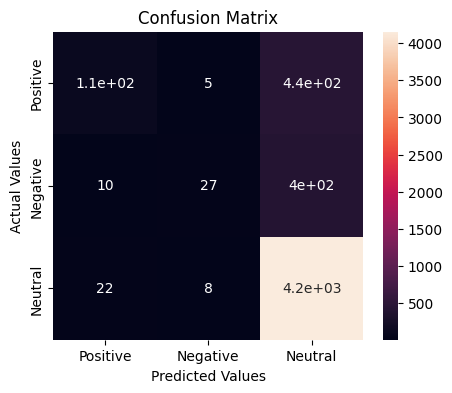

In [75]:
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()